In [87]:
# https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7

In [88]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [89]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [90]:
X_train.shape

(60000, 28, 28)

In [91]:
X_test.shape

(10000, 28, 28)

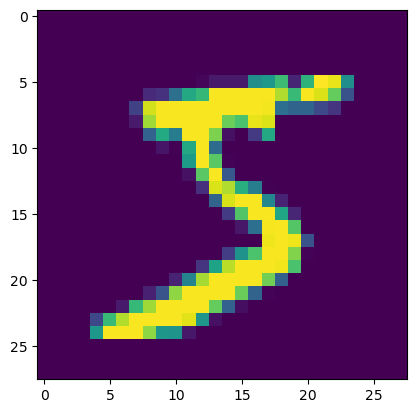

In [92]:
plt.imshow(X_train[0])

In [93]:
len(X_train)

60000

In [94]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [95]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [96]:
X_train_flattened.shape

(60000, 784)

In [97]:
help(keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [98]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # 10 is number of output neurons
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 11s 179us/sample - loss: 2.1435 - acc: 0.4683
Epoch 2/2
60000/60000 [==============================] - 12s 193us/sample - loss: 1.3851 - acc: 0.5322


In [99]:
# I do some scaling

In [100]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [101]:
X_train = X_train / 255
X_test = X_test / 255

In [102]:
X_train.shape

(60000, 28, 28)

In [103]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [104]:
help(keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [105]:
model2 = keras.Sequential([
    keras.layers.Dense(10, activation = 'sigmoid'), # I didn't have to put input_shape as an argument. It works without it
])

model2.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

model2.fit(X_train_flattened, y_train, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 11s 177us/sample - loss: 0.4903 - acc: 0.8773 - loss: 0.4925 - acc: 0.87
Epoch 2/2
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3061 - acc: 0.9159 - loss: 0.3


In [106]:
# As we can see, scaling gives better accuracy of the model

In [107]:
model2.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.2838 - acc: 0.9213


[0.28378038030862807, 0.9213]

In [108]:
y_test_2 = model2.predict(X_test_flattened)

In [109]:
y_test_2[0]

array([1.1870265e-04, 0.0000000e+00, 2.0775199e-04, 4.9988925e-03,
       6.2584877e-06, 1.3968349e-04, 1.7881393e-07, 7.5092858e-01,
       2.1228194e-04, 2.0318627e-03], dtype=float32)

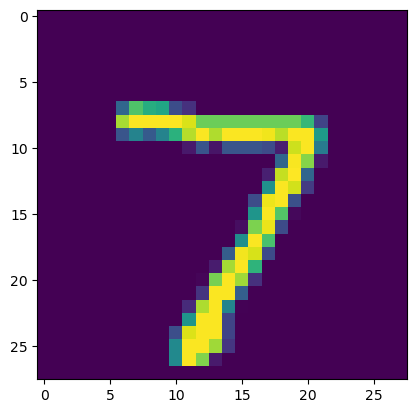

In [110]:
plt.imshow(X_test[0])

In [111]:
np.argmax(y_test_2[0])

7

In [112]:
# Ok, it works properly

In [113]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [114]:
y_predicted_labels = [np.argmax(i) for i in y_test_2]

In [115]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 6,
 0,
 6,
 4,
 2,


In [116]:
dir(tf.math)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_module_wrapper',
 '_sys',
 'abs',
 'accumulate_n',
 'acos',
 'acosh',
 'add',
 'add_n',
 'angle',
 'argmax',
 'argmin',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'bessel_i0',
 'bessel_i0e',
 'bessel_i1',
 'bessel_i1e',
 'betainc',
 'bincount',
 'ceil',
 'confusion_matrix',
 'conj',
 'cos',
 'cosh',
 'count_nonzero',
 'cumprod',
 'cumsum',
 'cumulative_logsumexp',
 'digamma',
 'divide',
 'divide_no_nan',
 'equal',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'floor',
 'floordiv',
 'floormod',
 'greater',
 'greater_equal',
 'igamma',
 'igammac',
 'imag',
 'in_top_k',
 'invert_permutation',
 'is_finite',
 'is_inf',
 'is_nan',
 'is_non_decreasing',
 'is_strictly_increasing',
 'l2_normalize',
 'lbeta',
 'less',
 'less_equal',
 'lgamma',
 'log',
 'log1p',
 'log_sigmoid',
 'log_softmax',
 'logical_and',
 'logical_not',
 'logical_or',
 'logical_xor',
 'max

In [117]:
help(tf.math.confusion_matrix)

Help on function confusion_matrix_v1 in module tensorflow.python.ops.confusion_matrix:

confusion_matrix_v1(labels, predictions, num_classes=None, dtype=tf.int32, name=None, weights=None)
    Computes the confusion matrix from predictions and labels.
    
    The matrix columns represent the prediction labels and the rows represent the
    real labels. The confusion matrix is always a 2-D array of shape `[n, n]`,
    where `n` is the number of valid labels for a given classification task. Both
    prediction and labels must be 1-D arrays of the same shape in order for this
    function to work.
    
    If `num_classes` is `None`, then `num_classes` will be set to one plus the
    maximum value in either predictions or labels. Class labels are expected to
    start at 0. For example, if `num_classes` is 3, then the possible labels
    would be `[0, 1, 2]`.
    
    If `weights` is not `None`, then each prediction contributes its
    corresponding weight to the total value of the confus

In [118]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [119]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 6,
 0,
 6,
 4,
 2,


In [122]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
# Uruchomienie sesji obliczeniowej
with tf.Session() as sess:
    # Wykonanie obliczeń dla tensora symbolicznego
    cm_array = sess.run(cm)

Text(95.72222222222221, 0.5, 'Truth')

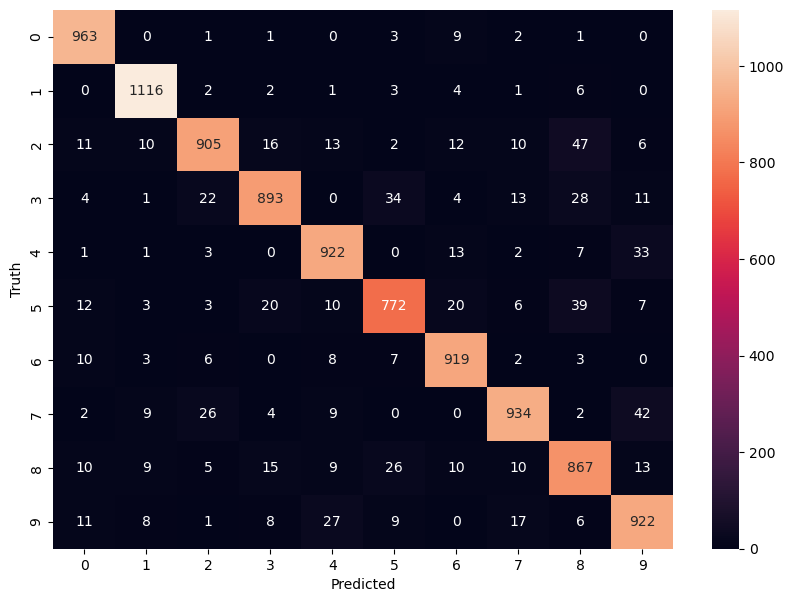

In [132]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm_array, annot = True, fmt='d' )
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [124]:
# I will check if code from git works:
# I've checked and there's also same warning as was above. So everything is ok.

In [129]:
model3 = keras.Sequential([
    keras.layers.Dense(100, activation = 'relu'), # I didn't have to put input_shape as an argument. It works without it
    keras.layers.Dense(10, activation = 'sigmoid')
])

model3.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

model3.fit(X_train_flattened, y_train, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2916 - acc: 0.9182
Epoch 2/2
60000/60000 [==============================] - 10s 175us/sample - loss: 0.1385 - acc: 0.9591


In [127]:
# As I can see. I've received better results with hidden layer than before without it

In [130]:
model3.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 2s 184us/sample - loss: 0.1173 - acc: 0.9655


[0.11730524017829448, 0.9655]

Text(95.72222222222221, 0.5, 'Truth')

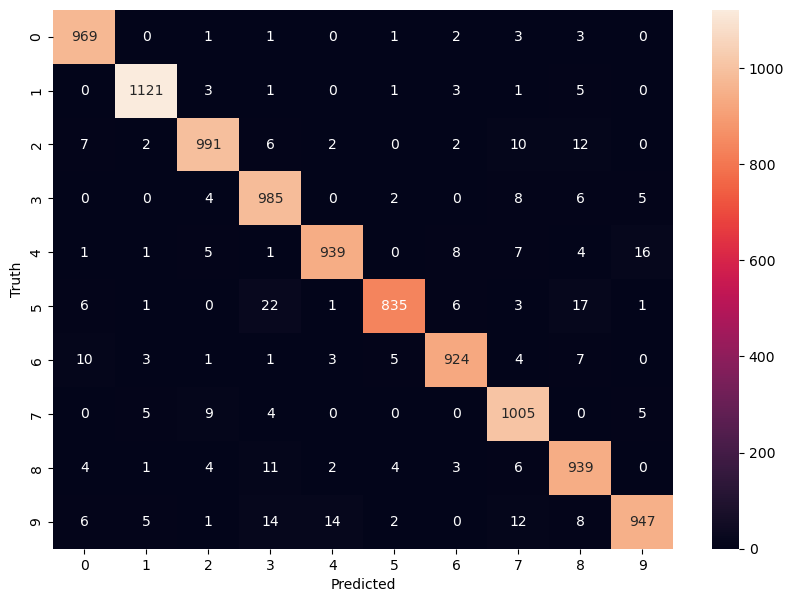

In [131]:
y_test_3 = model3.predict(X_test_flattened)
y_predicted_labels_2 = [np.argmax(i) for i in y_test_3]

cm2 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels_2)
# Uruchomienie sesji obliczeniowej
with tf.Session() as sess:
    # Wykonanie obliczeń dla tensora symbolicznego
    cm2_array = sess.run(cm2)
    
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2_array, annot = True, fmt='d' )
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [133]:
# For flatten function

In [134]:
help(keras.layers.Flatten)

Help on class Flatten in module tensorflow.python.keras.layers.core:

class Flatten(tensorflow.python.keras.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  If inputs are shaped `(batch,)` without a channel dimension, then flattening
 |  adds an extra channel dimension and output shapes are `(batch, 1)`.
 |  
 |  Arguments:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      It defaults to the `image_data_format` value found in your
 |      Keras config file at `~/.keras/keras.json`.
 |      If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  ```python
 |  model = Sequential()
 |  model.add(Convol

In [136]:
model4 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'), # I didn't have to put input_shape as an argument. It works without it
    keras.layers.Dense(10, activation = 'sigmoid')
])

model4.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

model4.fit(X_train, y_train, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2957 - acc: 0.9174
Epoch 2/2
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1361 - acc: 0.9600


In [137]:
# It's convenient because I don't have to create a flatten array :)

# Checking different model.compile parameters

In [138]:
# I search in google for "keras loss functions"

In [140]:
model5 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'), # I didn't have to put input_shape as an argument. It works without it
    keras.layers.Dense(10, activation = 'sigmoid')
])

model5.compile(optimizer = 'SGD', 
               loss = 'poisson', 
               metrics = ['accuracy'])

model5.fit(X_train, y_train, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 13s 209us/sample - loss: 1.0561 - acc: 0.0271
Epoch 2/2
60000/60000 [==============================] - 10s 169us/sample - loss: 1.0028 - acc: 0.0390
